In [1]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools.mask import iou

cocoGt=COCO('/scratch/users/zzweng/datasets/coco/annotations/instances_val2017.json')
cocoDt=cocoGt.loadRes('output/inference/coco_instances_results.json')

loading annotations into memory...
Done (t=1.02s)
creating index...
index created!
Loading and preparing results...
DONE (t=1.01s)
creating index...
index created!


In [9]:
from collections import Counter
Counter([a['category_id'] for a in cocoGt.anns.values()])

Counter({18: 218,
         64: 343,
         72: 288,
         16: 440,
         17: 202,
         19: 273,
         20: 361,
         21: 380,
         44: 1025,
         63: 261,
         62: 1791,
         67: 697,
         2: 316,
         3: 1932,
         4: 371,
         5: 143,
         6: 285,
         7: 190,
         9: 430,
         1: 11004,
         13: 75,
         28: 413,
         32: 254,
         54: 177,
         65: 163,
         77: 262,
         82: 126,
         85: 267,
         90: 57,
         8: 415,
         10: 637,
         11: 101,
         14: 60,
         15: 413,
         34: 115,
         35: 241,
         36: 69,
         41: 179,
         42: 269,
         46: 343,
         47: 899,
         48: 215,
         49: 326,
         50: 253,
         51: 626,
         52: 379,
         53: 239,
         55: 287,
         56: 316,
         57: 371,
         59: 285,
         61: 316,
         70: 179,
         73: 231,
         74: 106,
         75: 283,


In [26]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch, cv2
import skimage.io as io

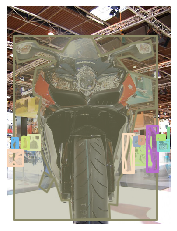

In [298]:
imgId = 480985
img = cocoGt.loadImgs([imgId])[0]
I = io.imread(img['coco_url'])
plt.imshow(I); plt.axis('off')
annIds = cocoGt.getAnnIds(imgIds=imgId, iscrowd=None)
anns = cocoGt.loadAnns(annIds)
cocoGt.showAnns(anns, draw_bbox=True)

In [261]:
img = cocoDt.loadImgs([imgId])[0]
I = io.imread(img['coco_url'])
plt.imshow(I); plt.axis('off')
annIds = cocoDt.getAnnIds(imgIds=imgId, iscrowd=None)
anns = cocoDt.loadAnns(annIds)
cocoGt.showAnns(anns, draw_bbox=False)

NameError: name 'imgId' is not defined

In [3]:
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

import torchvision
import torch.nn as nn
from tqdm.notebook import tqdm

# Run KMeans for evaluation

In [12]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
import os

%load_ext autoreload
%autoreload 2

In [5]:
from eval_kmeans import Eval_KMeans
evaluator = Eval_KMeans()


loading annotations into memory...
Done (t=0.99s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.29s)
creating index...
index created!
(2547, 2048) (2547,)
KNN accuracy 1.0


In [13]:
evaluator.fit_knn(5)

(2547, 2048) (2547,)
KNN accuracy 1.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

feats = evaluator.feats_gt
y = evaluator.feats_gt_y
train_feats, test_feats, train_y, test_y = train_test_split(feats, y)

In [18]:
neigh = KNeighborsClassifier(n_neighbors=3)#, weights='distance')
neigh.fit(train_feats, train_y)
print('KNN accuracy', neigh.score(train_feats, train_y))
print('KNN accuracy', neigh.score(test_feats, test_y))

KNN accuracy 0.7104712041884816
KNN accuracy 0.5274725274725275


In [14]:
Counter(evaluator.feats_gt_y)

Counter({44: 40,
         67: 68,
         1: 735,
         51: 49,
         79: 13,
         47: 53,
         81: 25,
         62: 124,
         82: 13,
         28: 40,
         31: 37,
         10: 10,
         2: 18,
         41: 8,
         3: 62,
         8: 19,
         70: 31,
         4: 20,
         76: 9,
         84: 33,
         72: 32,
         64: 27,
         86: 42,
         63: 36,
         55: 13,
         5: 18,
         16: 18,
         25: 19,
         21: 60,
         15: 28,
         20: 60,
         6: 13,
         7: 8,
         13: 5,
         18: 22,
         17: 23,
         33: 19,
         73: 15,
         32: 14,
         9: 12,
         22: 22,
         34: 3,
         27: 23,
         23: 4,
         24: 25,
         19: 15,
         35: 15,
         40: 8,
         52: 28,
         56: 66,
         60: 39,
         54: 26,
         61: 46,
         49: 25,
         37: 4,
         65: 18,
         59: 30,
         42: 13,
         43: 11,
         90:

In [6]:
evaluator.load_dt_features()

File features/4600_4700.npy not found. Skipped.
File features/4700_4800.npy not found. Skipped.


In [7]:
evaluator.feats.shape

(31610, 2048)

In [8]:
evaluator.run_kmeans(C=1000)

Running KMeans ...


/scratch/users/zzweng/miniconda3/envs/simclr/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
/scratch/users/zzweng/miniconda3/envs/simclr/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
/scratch/users/zzweng/miniconda3/envs/simclr/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)


In [9]:
evaluator.assign_labels()

  0%|          | 0/998 [00:00<?, ?it/s]

Assigning labels using KNN ...


100%|██████████| 998/998 [05:03<00:00,  3.29it/s]

Number of assigned clusters: 0


In [11]:
Counter(evaluator.clusters)

Counter({158: 130,
         175: 37,
         297: 198,
         247: 115,
         784: 96,
         921: 262,
         857: 16,
         127: 9,
         257: 92,
         238: 134,
         732: 52,
         467: 11,
         2: 62,
         605: 42,
         513: 117,
         98: 249,
         169: 232,
         936: 1,
         152: 240,
         14: 216,
         927: 71,
         173: 188,
         700: 142,
         573: 195,
         539: 135,
         222: 60,
         862: 327,
         332: 84,
         328: 103,
         261: 284,
         620: 47,
         34: 155,
         372: 134,
         43: 63,
         338: 134,
         713: 146,
         159: 171,
         757: 70,
         245: 291,
         75: 279,
         26: 314,
         569: 200,
         305: 83,
         764: 53,
         383: 257,
         479: 127,
         124: 125,
         51: 88,
         250: 101,
         90: 56,
         575: 179,
         577: 130,
         712: 48,
         197: 125,
       

In [12]:
print(len(evaluator.cluster_to_coco))
matched = set([v[0] for v in evaluator.cluster_to_coco.values()])
print(matched)
print(len(matched))
evaluator.cluster_to_coco

644
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 33, 34, 35, 37, 40, 41, 42, 43, 44, 46, 47, 49, 50, 51, 52, 54, 56, 57, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 77, 78, 79, 81, 82, 84, 85, 86, 87, 88, 90}
68


{0: (67, 1.0, 1),
 3: (1, 1.0, 1),
 4: (1, 1.0, 79),
 5: (1, 0.6029411764705882, 68),
 6: (1, 1.0, 1),
 8: (1, 0.9819004524886877, 221),
 9: (1, 0.9247311827956989, 93),
 12: (1, 1.0, 7),
 13: (1, 0.975, 40),
 14: (1, 1.0, 216),
 16: (1, 1.0, 2),
 17: (81, 1.0, 1),
 19: (8, 0.6666666666666666, 3),
 20: (81, 1.0, 1),
 22: (41, 1.0, 1),
 23: (1, 1.0, 1),
 25: (1, 1.0, 1),
 26: (1, 0.6592356687898089, 314),
 27: (1, 1.0, 11),
 28: (88, 0.9038461538461539, 52),
 30: (3, 0.7272727272727273, 121),
 32: (3, 0.8, 105),
 34: (1, 0.9225806451612903, 155),
 35: (1, 1.0, 1),
 36: (9, 1.0, 1),
 37: (24, 0.926829268292683, 82),
 38: (2, 1.0, 1),
 39: (1, 1.0, 1),
 40: (22, 1.0, 1),
 42: (1, 1.0, 1),
 45: (1, 1.0, 1),
 46: (85, 0.9591836734693877, 49),
 47: (1, 1.0, 134),
 52: (1, 0.984251968503937, 254),
 53: (37, 0.8888888888888888, 9),
 55: (62, 1.0, 1),
 57: (1, 1.0, 2),
 58: (1, 1.0, 1),
 60: (21, 1.0, 1),
 62: (75, 1.0, 1),
 63: (1, 1.0, 1),
 67: (8, 1.0, 1),
 69: (20, 0.8055555555555556, 72),


In [35]:
(evaluator.clusters==2).sum()

62

NameError: name 'evaluator' is not defined

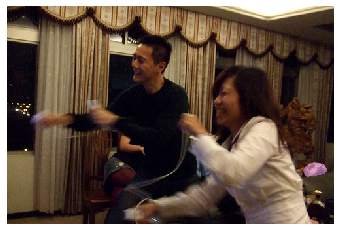

In [47]:
cocoDt = evaluator.cocoDt
ann_id = np.array(evaluator.feats_ann)[evaluator.clusters==2][46]
ann = cocoDt.loadAnns([ann_id])[0]
img = cocoDt.loadImgs([ann['image_id']])[0]
I = io.imread(img['coco_url'])
plt.imshow(I); plt.axis('off')
evaluator.cocoDt.showAnns([evaluator.cocoDt.anns[ann_id]], False)

In [33]:
evaluator.evaluate()

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!
Loading and preparing results...


100%|██████████| 31610/31610 [00:00<00:00, 525785.02it/s]

DONE (t=0.28s)
creating index...
index created!
Updating category ids
Finally, evaluate!!
Running per image evaluation...
Evaluate annotation type *segm*


DONE (t=4.61s).
Accumulating evaluation results...
DONE (t=0.40s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.066
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.072
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.102
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.045
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.094
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.097
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.029
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar

In [30]:
# evaluator.evaluate_class_agnostic_all()

In [32]:
# evaluator.evaluate_class_agnostic()